In [11]:
import wave
import numpy as np
import matplotlib.pyplot as plt

wr = wave.open('recfile/file.wav', 'r')
sz = 48000 # Read and process 1 second at a time.
da = np.fromstring(wr.readframes(sz), dtype=np.int32)
left, right = da[0::2], da[1::2]


In [12]:
lf, rf = np.fft.rfft(left), np.fft.rfft(right)

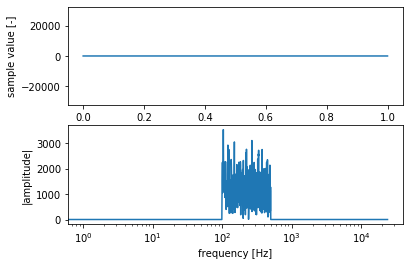

In [22]:
import matplotlib.pyplot as plt

plt.figure(1)
a = plt.subplot(211)
r = 2**16/2
a.set_ylim([-r, r])
a.set_xlabel('time [s]')
a.set_ylabel('sample value [-]')
x = np.arange(48000)/48000
plt.plot(x, left)
b = plt.subplot(212)
b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(abs(lf))
plt.savefig('sample-graph.png')


In [16]:
lowpass = 100 # Remove lower frequencies.
highpass = 500 # Remove higher frequencies.

lf[:lowpass], rf[:lowpass] = 0, 0 # low pass filter (1)
lf[55:66], rf[55:66] = 0, 0 # line noise filter (2)
lf[highpass:], rf[highpass:] = 0,0 # high pass filter (3)
nl, nr = np.fft.irfft(lf), np.fft.irfft(rf) # (4)
ns = np.column_stack((nl,nr)).ravel().astype(np.int16)

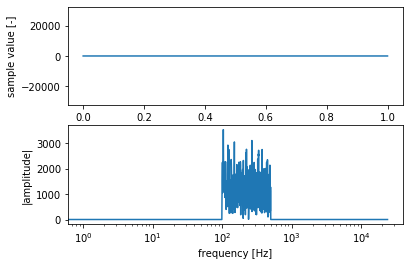

In [17]:
plt.figure(2)
a = plt.subplot(211)
r = 2**16/2
a.set_ylim([-r, r])
a.set_xlabel('time [s]')
a.set_ylabel('sample value [-]')
x = np.arange(48000)/48000
plt.plot(x, left)
b = plt.subplot(212)
b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(abs(lf))
plt.savefig('sample-graph.png')

In [19]:
import wave
obj = wave.open('recfile/file.wav','r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()

Number of channels 2
Sample width 4
Frame rate. 48000
Number of frames 180000
parameters: _wave_params(nchannels=2, sampwidth=4, framerate=48000, nframes=180000, comptype='NONE', compname='not compressed')
